experiments/exp39/11.21_14.17.08/logs.txt


100%|██████████| 36/36 [00:00<00:00, 111765.32it/s]

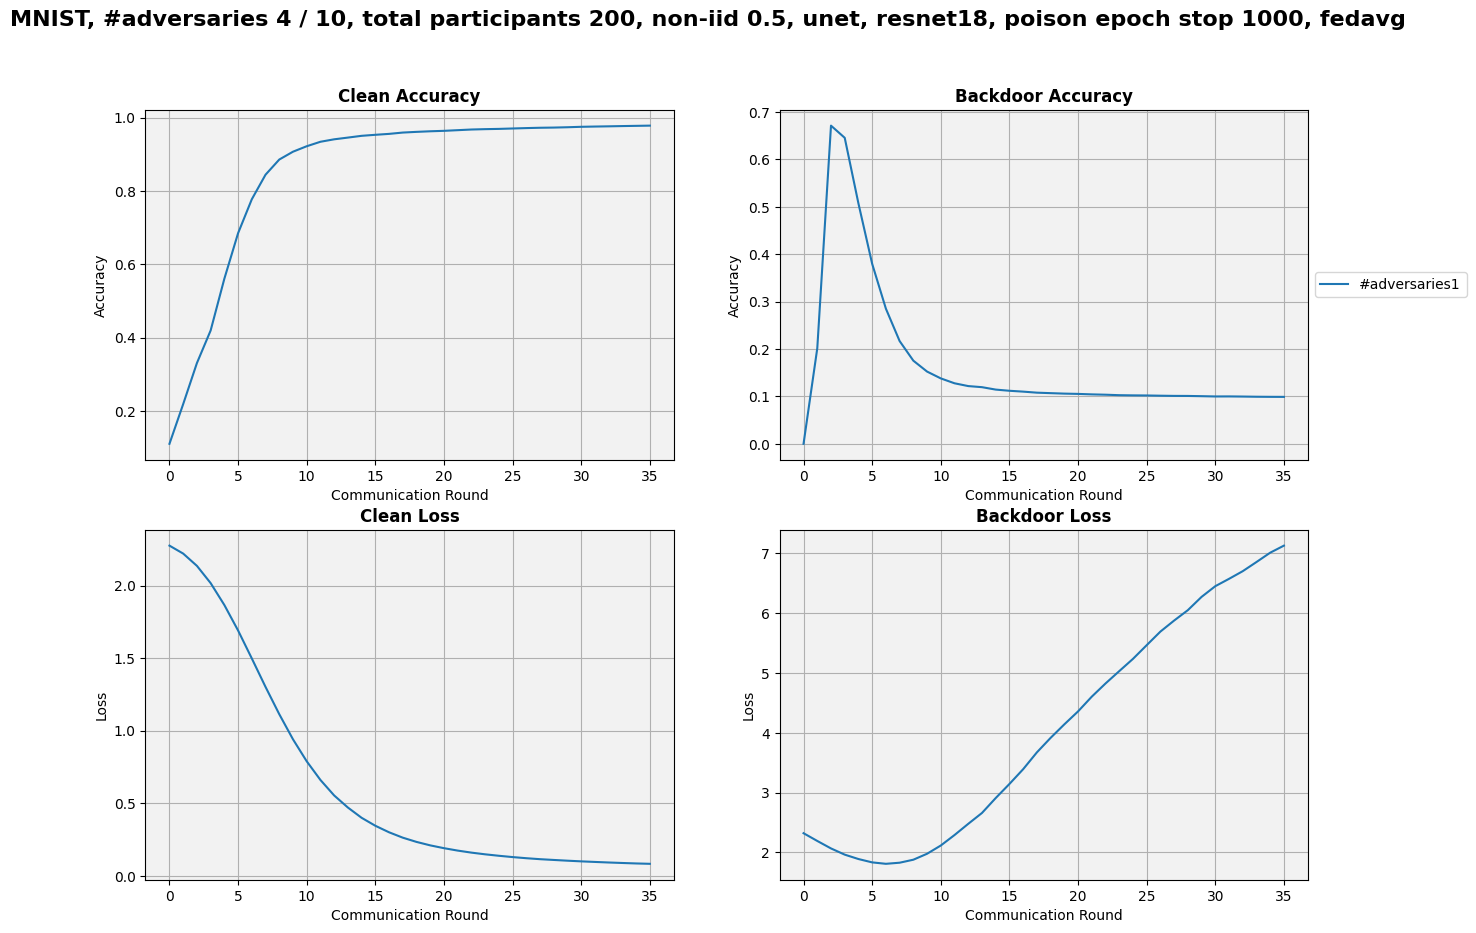

In [24]:
import re
from tqdm import tqdm

# Define the regex pattern
pattern = r"Loss: clean ([0-9.]+) poison ([0-9.]+), Accuracy: clean ([0-9.]+) poison ([0-9.]+)"

# list_text_file = [("logs_all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs5_conditionalautoencoder_adversaries1_alpha0.5.png"),
#                   ("logs_all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.txt", "all2all_poisonepochs10_conditionalautoencoder_adversaries1_alpha0.5.png")]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_poisonepochstop20_noniid_simplenet_rflbat.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_targetsamples_noniid_simplenet_rflbat.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants20_noniid_simplenet_fixedfrequency5_rflbat.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop100_noniid_simplenet_fixedfrequency10_fedavg.txt"
                  
#                   ]

# list_text_file = ["experiments/exp1/Oct.26_06.19.26/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.19.45/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.19.58/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.20.09/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp1/Oct.26_06.20.18/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop100_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   ]

# list_text_file = ["experiments/exp3/Oct.26_07.07.31/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.08.08/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.08.28/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.08.51/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp3/Oct.26_07.09.17/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "experiments/exp2/Oct.26_06.59.41/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg_verified.txt",
#                   "experiments/exp2/Oct.26_07.01.50/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg_verified.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_simplenet_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_fedavg.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_deepsight.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_flame.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_fldetector.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_foolsgold.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop100_rflbat.txt"
#                   ]

# list_text_file = ["logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_noniid.txt",
#                   "logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_noniid.txt"
#                   ]

# list_text_file = ["experiments/exp4/Oct.29_06.39.05/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.42.28/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.43.26/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.43.51/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp4/Oct.29_06.44.16/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop20_noniid_resnet18_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp5/Oct.29_14.36.01/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.36.29/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.37.02/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.37.17/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp5/Oct.29_14.37.33/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_poisonepochstop200_noniid_resnet18_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp6/Oct.30_03.30.38/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.31.22/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.31.38/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.32.35/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp6/Oct.30_03.33.07/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp7/Oct.30_06.34.22/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_fedavg.txt",
#                   "experiments/exp8/Oct.30_07.14.01/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_fedavg.txt",
#                   "experiments/exp9/Oct.30_09.26.32/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_adam_fedavg.txt",
#                   "experiments/exp10/Oct.30_09.33.35/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_adam_fedavg.txt",
#                   "experiments/exp11/Oct.31_03.40.14/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.1_adam_fedavg.txt",
#                   "experiments/exp12/Oct.31_06.36.35/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_adam_fedavg.txt",
#                   "experiments/exp13/Oct.31_07.08.05/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_adam_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp12/Oct.31_08.36.33/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.37.01/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.37.22/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.38.03/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.38.31/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   ]

# list_text_file = ["experiments/exp17/Oct.31_16.34.23/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.34.38/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.35.03/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.35.24/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp17/Oct.31_16.35.43/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"]

# list_text_file = ["experiments/exp18/Oct.31_16.45.31/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp18/Oct.31_16.46.01/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp18/Oct.31_16.46.18/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp18/Oct.31_16.46.43/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp18/Oct.31_16.48.35/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt"]

# list_text_file = ["experiments/exp15/Oct.31_09.16.34/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.03/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.22/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.36/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt",
#                   "experiments/exp15/Oct.31_09.17.53/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency10_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp19/Nov.01_09.09.49/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp19/Nov.01_09.10.05/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp19/Nov.01_09.10.16/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp19/Nov.01_09.10.25/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp19/Nov.01_09.10.33/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"
#                   ]

# list_text_file = ["experiments/exp13/Oct.31_07.08.05/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_lr0.01_adam_fedavg.txt"]

# list_text_file = ["experiments/exp12/Oct.31_08.36.33/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.37.01/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.37.22/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.38.03/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp12/Oct.31_08.38.31/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"]

# list_text_file = ["experiments/exp20/Nov.02_07.35.02/logs_all2one_poisonepochs5_unet_adversaries1_alpha0.5_targetlabel[1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp20/Nov.02_07.35.23/logs_all2one_poisonepochs5_unet_adversaries2_alpha0.5_targetlabel[1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp20/Nov.02_07.35.45/logs_all2one_poisonepochs5_unet_adversaries3_alpha0.5_targetlabel[1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp20/Nov.02_07.37.06/logs_all2one_poisonepochs5_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt",
#                   "experiments/exp20/Nov.02_07.37.27/logs_all2one_poisonepochs5_unet_adversaries5_alpha0.5_targetlabel[1,1,1,1,1]_participants5_normaltraining_noniid_resnet18_fixedfrequency1_fedavg.txt"]

list_text_file = ["experiments/exp21/11.03_11.56.34/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt"]

# list_text_file = ["experiments/exp23/11.03_16.25.05/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt"]

list_text_file = ["experiments/exp23/11.03_15.41.48/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_16.25.05/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_17.13.48/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_17.27.00/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt"]

list_text_file = [
                  
                #   "experiments/exp23/11.03_21.56.37/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                #   "experiments/exp23/11.03_21.57.13/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                #   "experiments/exp23/11.03_21.57.57/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                #   "experiments/exp23/11.03_21.58.56/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                #   "experiments/exp23/11.03_21.59.58/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                #   "experiments/exp23/11.03_22.01.16/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt"
                ]

list_text_file = [
                  
                  "experiments/exp23/11.03_21.54.05/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_21.54.54/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_21.56.37/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_21.57.13/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_21.58.56/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_21.59.58/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                  "experiments/exp23/11.03_22.01.16/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt"
                ]

list_text_file = [
                  
                  "experiments/exp25/11.04_18.25.55/logs_all2one_poisonepochs1000_unet_adversaries4_alpha0.5_targetlabel[1,1,1,1]_participants200_normaltraining_noniid_simplenet_fixedfrequency1_fedavg.txt",
                ]

list_text_file = [
    
                    # "experiments/exp26/11.04_23.09.56/logs.txt",
                    # "experiments/exp26/11.05_00.22.14/logs.txt",
                    # "experiments/exp26/11.05_01.28.58/logs.txt",
                    # "experiments/exp26/11.05_02.28.06/logs.txt",
                    "experiments/exp26/11.05_04.10.59/logs.txt",
                    "experiments/exp26/11.05_04.19.36/logs.txt",
                    "experiments/exp26/11.05_07.41.21/logs.txt"
                ]

list_text_file = [
                    # "experiments/exp27/11.06_19.35.39/logs.txt",
                    # "experiments/exp28/11.06_22.47.59/logs.txt",
                    # "experiments/exp29/11.06_23.29.11/logs.txt",
                    # "experiments/exp30/11.06_23.29.31/logs.txt",
                    # "experiments/exp31/11.06_23.29.45/logs.txt",
                    # "experiments/exp32/11.06_23.29.59/logs.txt",
                    # "experiments/exp33/11.06_23.30.13/logs.txt",
                    # "experiments/exp34/11.06_23.45.08/logs.txt",
                    # "experiments/exp34/11.07_13.09.09/logs.txt",
                    # "experiments/exp34/11.07_13.41.02/logs.txt",
                    # "experiments/exp35/11.07_17.50.52/logs.txt",
                    # "experiments/exp35/11.07_23.23.06/logs.txt",
                    # "experiments/exp35/11.08_08.36.05/logs.txt",
                    # "experiments/exp35/11.08_10.32.19/logs.txt",
                    # "experiments/exp35/11.08_10.56.58/logs.txt",
                    # "experiments/exp36/11.09_11.58.02/logs.txt",
                    # "experiments/exp37/11.09_13.43.40/logs.txt",
                    # "/ssd_data/Son/LRBA/experiments/exp38/11.20_17.37.53/logs.txt",
                    "experiments/exp39/11.21_14.17.08/logs.txt"
                ]

record = [{"clean_loss": [],
        "backdoor_loss": [],
        "clean_accuracy": [],
        "backdoor_accuracy": []} for i in range(len(list_text_file))]


# Load text files and read them in lines. After that put into a list of dictionaries, each dictionary corresponds to a text file.
for text_file in list_text_file:
    print(text_file)
    with open(text_file, "r") as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines if "Test set:" in line]
    for line in tqdm(lines):

        # Use the regex pattern to find matches in the text
        matches = re.search(pattern, line)

        if matches:
            clean_loss = float(matches.group(1))
            poison_loss = float(matches.group(2))
            clean_accuracy = float(matches.group(3))
            poison_accuracy = float(matches.group(4))

            # Add the results to the dictionary record

            record[list_text_file.index(text_file)]["clean_loss"].append(clean_loss)
            record[list_text_file.index(text_file)]["backdoor_loss"].append(poison_loss)
            record[list_text_file.index(text_file)]["clean_accuracy"].append(clean_accuracy)
            record[list_text_file.index(text_file)]["backdoor_accuracy"].append(poison_accuracy)

        else:
            print("No match found.")

# plot clean accuracy, backdoor accuracy, clean loss, backdoor loss into subplots(2,2)
# Display the y axis range from 0 to 1, x axis range from 0 to 100
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

prefix = ["#adversaries" + str(i+1) for i in range(len(list_text_file))]
# prefix = ["FedAvg", "Deepsight", "FLAME", "FLDetector", "Foolsgold", "RFLBAT"]
# Set title of the whole figure
fig.suptitle("MNIST, #adversaries 4 / 10, total participants 200, non-iid 0.5, unet, resnet18, poison epoch stop 1000, fedavg", fontsize=16, fontweight='bold')

for i in range(len(list_text_file)):
    ax1.plot(record[i]["clean_accuracy"], label=prefix[i], linewidth=1.5)
    ax1.set_title("Clean Accuracy")
    ax1.title.set_weight('bold')
    ax1.set_xlabel("Communication Round")
    ax1.set_ylabel("Accuracy")
    ax1.grid(True)
    ax1.set_facecolor((0.95, 0.95, 0.95))
    # ax1.legend()
    # ax1.legend(framealpha=0.5)
    # Apply the same color of clean_accuracy to backdoor_accuracy. Backdoor accuracy is a dash line. Make the line bold.
    ax2.plot(record[i]["backdoor_accuracy"], label=prefix[i], color=ax1.lines[-1].get_color(), linewidth=1.5)
    # ax1.plot(record[i]["backdoor_accuracy"], label="backdoor" + str(i))
    ax2.set_title("Backdoor Accuracy")
    ax2.title.set_weight('bold')
    ax2.set_xlabel("Communication Round")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    ax2.set_facecolor((0.95, 0.95, 0.95))
    # ax2.legend()
    # ax2.legend(framealpha=0.5)
    # Show legend on the right side of the plot, on the top right outside of the plot
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # ax1.set_xlim([0, 100])
    # ax1.set_ylim([0, 1])
    # Make the legend above the plot
    # ax1.legend(loc='center', bbox_to_anchor=(1, 0.5))
    # ax1.legend()

    ax3.plot(record[i]["clean_loss"], label=prefix[i], linewidth=1.5)
    ax3.set_title("Clean Loss")
    ax3.title.set_weight('bold')
    ax3.set_xlabel("Communication Round")
    ax3.set_ylabel("Loss")
    ax3.grid(True)
    ax3.set_facecolor((0.95, 0.95, 0.95))
    # ax3.grid()
    # ax3.legend()
    # ax3.legend(framealpha=0.5)

    ax4.plot(record[i]["backdoor_loss"], label=prefix[i], color=ax3.lines[-1].get_color(), linewidth=1.5)
    ax4.set_title("Backdoor Loss")
    ax4.title.set_weight('bold')
    ax4.set_xlabel("Communication Round")
    ax4.set_ylabel("Loss")
    ax4.grid(True)
    ax4.set_facecolor((0.95, 0.95, 0.95))
    
    # ax4.legend()
    # ax4.legend(framealpha=0.5)
    # ax2.set_xlim([0, 100])
    # Set y axis range starts from 0 and it doesn't have a upper limit
    # ax2.set_ylim([0, None])
    # ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5)).
    # ax2.legend()


In [62]:
import pickle


path = "dataloaders/poison_loader_11.05_03.30.41.pkl"
with open(path, 'rb') as f:
    poison_loader = pickle.load(f)
    print("poison_loader loaded from disk.")

poison_loader loaded from disk.


In [65]:
poison_loader.batch_size

64

In [67]:
len(poison_loader)

16

In [96]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn


In [147]:
torch.tensor([4, 0, 4])

tensor([4, 0, 4])

In [150]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Initialize the neural network
input_size = 10
output_size = 5
model = SimpleNN(input_size, output_size)

# Create some dummy input data
input_data = torch.ones(3, input_size, requires_grad=True)

# Initialize cross-entropy loss with reduction='none'
criterion = nn.CrossEntropyLoss(reduction='none')

# Initialize SGD optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Forward pass
output = model(input_data)

# Create dummy target labels
target_labels = torch.tensor([4, 0, 4])

# Calculate the loss
loss = criterion(output, target_labels)

# Zero the gradients before backward pass
optimizer.zero_grad()

# Backward pass with retain_graph=True
loss.mean().backward(retain_graph=True)

# Print gradients for the input_data
print("Gradients of input_data after the first backward pass:")
print(input_data.grad)

# Update the weights using the optimizer
optimizer.step()

# Perform another backward pass (just for demonstration, you may not need this in a real scenario)
# If you don't use retain_graph=True, this will throw an error after the first backward pass
loss.mean().backward()

# Update the weights again
optimizer.step()

# Print gradients for the input_data after the second backward pass
print("\nGradients of input_data after the second backward pass:")
print(input_data.grad)


Gradients of input_data after the first backward pass:
tensor([[-0.0149, -0.0980, -0.0254, -0.0158, -0.0461,  0.0153,  0.0266, -0.0261,
          0.0441,  0.0574],
        [ 0.0689, -0.0248, -0.0113,  0.0964,  0.0721, -0.0804, -0.0321,  0.0367,
         -0.0672,  0.0581],
        [-0.0149, -0.0980, -0.0254, -0.0158, -0.0461,  0.0153,  0.0266, -0.0261,
          0.0441,  0.0574]])


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [10, 5]], which is output 0 of AsStridedBackward0, is at version 2; expected version 1 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

In [293]:
from copy import deepcopy

# Create a tensor a, and b
a = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
b = torch.tensor([4, 5, 6], dtype=torch.float32, requires_grad=True)

e = deepcopy(a)
f = deepcopy(b)
# Create an optimizer that keeps track of a and b
optimizer1 = optim.SGD([a, b], lr=0.01)
optimizer2 = optim.SGD([e, f], lr=0.01)
c = a + b

In [294]:
c.sum().backward(retain_graph=True)

In [295]:
a.grad

tensor([1., 1., 1.])

In [296]:
b.grad

tensor([1., 1., 1.])

In [297]:
optimizer1.step()

In [298]:
a, b

(tensor([0.9900, 1.9900, 2.9900], requires_grad=True),
 tensor([3.9900, 4.9900, 5.9900], requires_grad=True))

In [242]:
a.grad.zero_()

tensor([0., 0., 0.])

In [243]:
b.grad.zero_()

tensor([0., 0., 0.])

In [287]:
d = a + b
d

tensor([5., 7., 9.], grad_fn=<AddBackward0>)

In [288]:
d.sum().backward()

In [291]:
e.grad

tensor([1., 1., 1.])

In [292]:
f.grad

tensor([1., 1., 1.])

In [232]:
a.grad.zero_()

tensor([0., 0., 0.])

In [233]:
b.grad.zero_()

tensor([0., 0., 0.])

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Initialize the neural network
input_size = 10
output_size = 5
model = SimpleNN(input_size, output_size)

# Create some dummy input data
input_data = torch.ones(3, input_size, requires_grad=True)

# Initialize cross-entropy loss with reduction='none'
criterion = nn.CrossEntropyLoss(reduction='none')

# Forward pass
output = model(input_data)

# Create dummy target labels
target_labels = torch.tensor([0, 3, 1], dtype=torch.int64)

# Calculate the loss
loss = criterion(output, target_labels)

# Backward pass with retain_graph=True
loss.mean().backward(retain_graph=True)

# Print gradients for the input_data
print("Gradients of input_data after the first backward pass:")
print(input_data.grad)

# Perform another backward pass (just for demonstration, you may not need this in a real scenario)
# If you don't use retain_graph=True, this will throw an error after the first backward pass
loss.mean().backward()

# Print gradients for the input_data after the second backward pass
print("\nGradients of input_data after the second backward pass:")
print(input_data.grad)


Gradients of input_data after the first backward pass:
tensor([[-0.0694,  0.0041,  0.0712,  0.0547,  0.0419,  0.0250,  0.0685,  0.1135,
          0.0492,  0.0148],
        [-0.0280,  0.0538, -0.0581,  0.0615, -0.0439,  0.0310, -0.0554, -0.0385,
          0.0152, -0.0596],
        [-0.0606, -0.0688,  0.0228,  0.0303,  0.0265,  0.0869,  0.0218,  0.0662,
         -0.0131,  0.1477]])

Gradients of input_data after the second backward pass:
tensor([[-0.1388,  0.0083,  0.1423,  0.1095,  0.0838,  0.0500,  0.1369,  0.2270,
          0.0985,  0.0297],
        [-0.0560,  0.1077, -0.1163,  0.1230, -0.0877,  0.0620, -0.1108, -0.0770,
          0.0304, -0.1191],
        [-0.1212, -0.1375,  0.0455,  0.0607,  0.0531,  0.1739,  0.0436,  0.1324,
         -0.0261,  0.2954]])


In [13]:
# Creaet a tensor a, and b
a = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)
b = torch.tensor([4, 5, 6], dtype=torch.float32, requires_grad=True)
optimizer1 = optim.SGD([a, b], lr=0.01)
# optimizer2 = optim.SGD([a, b], lr=0.01)
c = a + b
d = a + b

In [14]:
c.sum().backward(retain_graph=True)

In [15]:
a.grad, b.grad

(tensor([1., 1., 1.]), tensor([1., 1., 1.]))

In [16]:
d.sum().backward()

In [17]:
a.grad, b.grad

(tensor([2., 2., 2.]), tensor([2., 2., 2.]))

In [6]:
optimizer1.zero_grad()

In [7]:
a.grad, b.grad

(None, None)